In [85]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [86]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')

In [87]:
print(train.shape, test.shape)

(114, 11) (228, 10)


In [88]:
train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [89]:
train.columns

Index(['id', 'Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

In [90]:
train['Island'].unique()

array(['Biscoe', 'Dream', 'Torgersen'], dtype=object)

In [91]:
train.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [92]:
# 범주형 정수로 인코딩 ( 좋은 방법은 아닌 것 같음 )

# data['Clutch Completion'] = data['Clutch Completion'].map(
#     {
#         'Yes': 0,
#         'No': 1,
#     }
# )
#
# data['Sex'] = data['Sex'].map(
#     {
#         'MALE': 0,
#         'FEMALE': 1,
#     }
# )
#
# data['Species'] = data['Species'].map(
#     {
#         'Gentoo penguin (Pygoscelis papua)': 0,
#         'Chinstrap penguin (Pygoscelis antarctica)': 1,
#         'Adelie Penguin (Pygoscelis adeliae)': 2
#     }
# )
#
# data['Island'] = data['Island'].map(
#     {
#         'Biscoe': 0,
#         'Dream': 1,
#         'Torgersen': 2
#     }
# )
#
# test['Clutch Completion'] = test['Clutch Completion'].map(
#     {
#         'Yes': 0,
#         'No': 1,
#     }
# )
#
# test['Sex'] = test['Sex'].map(
#     {
#         'MALE': 0,
#         'FEMALE': 1,
#     }
# )
#
# test['Species'] = test['Species'].map(
#     {
#         'Gentoo penguin (Pygoscelis papua)': 0,
#         'Chinstrap penguin (Pygoscelis antarctica)': 1,
#         'Adelie Penguin (Pygoscelis adeliae)': 2
#     }
# )
#
# test['Island'] = test['Island'].map(
#     {
#         'Biscoe': 0,
#         'Dream': 1,
#         'Torgersen': 2
#     }
# )

In [93]:
train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [94]:
train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [95]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

C:\Users\Jun\AppData\Local\Temp/ipykernel_11964/823492497.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.mean(), inplace=True)
C:\Users\Jun\AppData\Local\Temp/ipykernel_11964/823492497.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.mean(), inplace=True)


<AxesSubplot:>

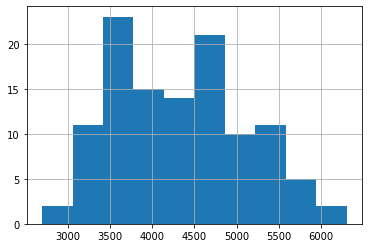

In [96]:
train['Body Mass (g)'].hist()

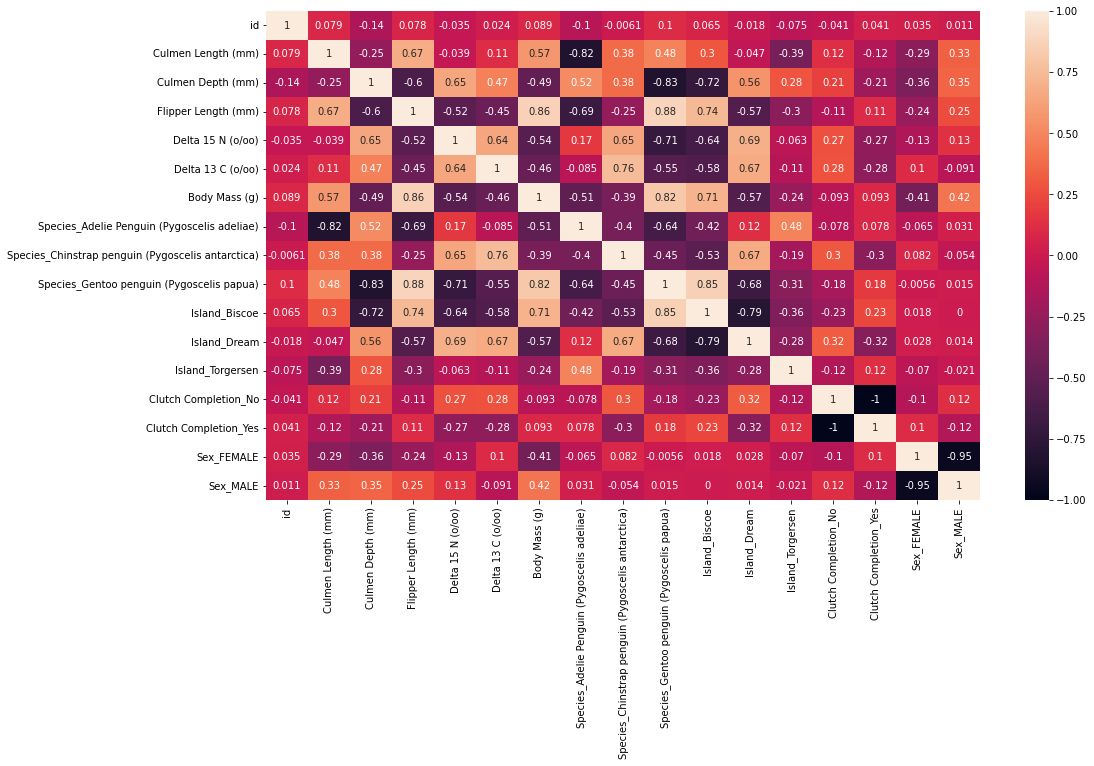

In [103]:
plt.figure(figsize=(16, 9))
ax = sns.heatmap(train.corr(), annot=True)
plt.show()

In [ ]:
train.columns


In [ ]:
# 결측치 처리
# data['Sex'].fillna(data['Sex'].mode(), inplace=True)
# data['Delta 13 C (o/oo)'].fillna(data.loc.id.mode(), inplace=True)
# data['Delta 15 N (o/oo)'].fillna(data['Delta 15 N (o/oo)'].mode(), inplace=True)
#
# test['Sex'].fillna(test['Sex'].mode(), inplace=True)
# test['Delta 13 C (o/oo)'].fillna(test['Delta 13 C (o/oo)'].mode(), inplace=True)
# test['Delta 15 N (o/oo)'].fillna(test['Delta 15 N (o/oo)'].mode(), inplace=True)

In [ ]:
X = train.drop(columns=['Body Mass (g)'])
y = train['Body Mass (g)']

In [ ]:
def RMSE(true, pred):
    score = np.sqrt(np.mean(np.square(true - pred)))
    return score

In [ ]:
xgb = XGBRegressor()

xgb.fit(X, y)

print(xgb.score(X, y))

In [ ]:
y_pred = xgb.predict(X)

RMSE(y, y_pred)

In [ ]:
sample_submission['Body Mass (g)'] = xgb.predict(test)

In [ ]:
pd.DataFrame(sample_submission).to_csv('./predict_result/predict_1.csv', index=False)

In [ ]:
# submission.drop()

In [ ]:
# pd.merge(left=submission, right=y_test_pred, how='inner')
# test 셋의 drop 여부에 따라서 어떻게 바뀔지가 필요